# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

reward xy 1.0 
penalty 0.9999397197291956 
reward_z 0.9861013638098266
reward xy 0.9999803096202786 
penalty 0.9995744084976814 
reward_z 0.9758010149876137
reward xy 0.9998069904323347 
penalty 0.9989042460570459 
reward_z 0.9665287288667007
reward xy 0.9990719962450268 
penalty 0.9979509749655023 
reward_z 0.959888387653092
reward xy 0.9971134176574973 
penalty 0.9967519535692361 
reward_z 0.9562324340032736
reward xy 0.9931047701351746 
penalty 0.9953076939823635 
reward_z 0.9545444340564563
reward xy 0.9856457110988694 
penalty 0.993627172888341 
reward_z 0.9565048354917495
reward xy 0.9730162423389386 
penalty 0.9918693947129461 
reward_z 0.9658276959689911
reward xy 0.9536367197295971 
penalty 0.9900344278189571 
reward_z 0.9753387531859974
reward xy 0.9252357820985162 
penalty 0.9881485614937351 
reward_z 0.9494086034080379
reward xy 0.8853604530250291 
penalty 0.9863440597321985 
reward_z 0.9307762661848086
reward xy 0.8320690842246511 
penalty 0.9846206799920109 
reward_z 0.91

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

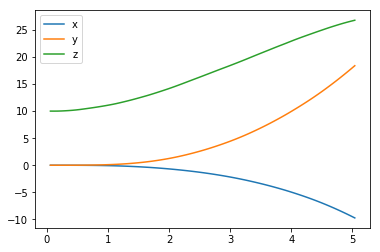

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

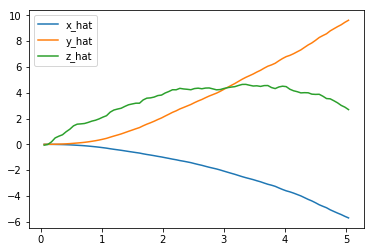

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

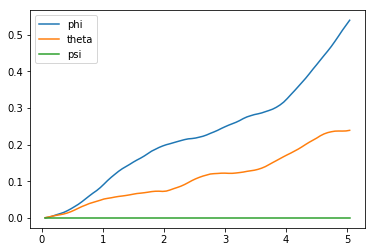

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

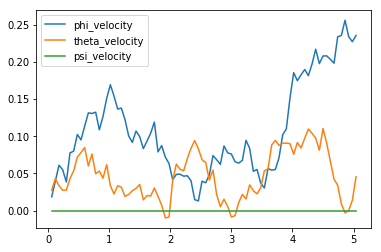

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

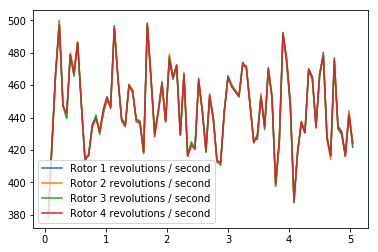

In [12]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [13]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 0.          0.         10.00338934  0.02991474  1.51189153  0.        ]
[0.         0.         0.33893421]
[0.24460067 3.94843686 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [14]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

TypeError: 'NoneType' object is not subscriptable

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

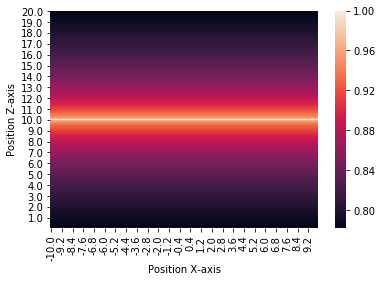

In [18]:
import seaborn as sns
import math 
%matplotlib inline

def map_function(reward_function, x, y, target_pos, upper_bounds, lower_bounds):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos, upper_bounds, lower_bounds)

    return R

def get_normalized_distances(pos, target, upper, lower):
    return [d / max_d for d, max_d in
                zip(distances(pos, target), distances(upper, lower))]

def get_distance_rewards(pos, target, upper, lower):
    return [1. - d ** 0.4 for d in get_normalized_distances(pos, target, upper, lower)]
    
def distances(pos1, pos2):
    return [distance(p1, p2) for p1, p2 in zip(pos1, pos2)]

def distance(p1, p2):
    return np.sqrt(np.power(p1 - p2, 2.))



eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
reward_function = lambda pose, target_pos, upper, lower: 1. - get_normalized_distances(pose, target_pos, upper, lower)[1]**0.4
                                                                 
upper_bounds = np.array([150., 300.])
lower_bounds = np.array([0., -150.])
x_range = np.round(np.arange(-10.0,10,0.1), 2)
z_range = np.round(np.arange(20,0,-0.1), 2)

target_pos = np.array([0, 10])

R = map_function(reward_function, x_range, z_range, target_pos, upper_bounds, lower_bounds)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()



In [ ]:
from agents.agent import DDPG
from monitor import interact

# runtime = 200.                                     
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 15.])

task = Task(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
agent = DDPG(task)
num_trials = 600

episode_rewards, best_reward = interact(task, agent, num_trials)

Episode 1/600 || Reward -42.96166167874537 || Best reward -42.96166167874537 
Quadcopter pose [-3.10471123  0.48214259  0.        ]
Episode 2/600 || Reward -42.97358107580958 || Best reward -42.96166167874537 
Quadcopter pose [-3.16344468  0.45616912  0.        ]
Episode 3/600 || Reward -42.97296075476909 || Best reward -42.96166167874537 
Quadcopter pose [-3.18417053  0.43937683  0.        ]
Episode 4/600 || Reward -27.762545466867483 || Best reward -27.762545466867483 
Quadcopter pose [-1.57394715  0.35836255  0.        ]
Episode 5/600 || Reward -42.96315682939554 || Best reward -27.762545466867483 
Quadcopter pose [0.13093991 0.42663385 0.        ]
Episode 6/600 || Reward -28.06851559897771 || Best reward -27.762545466867483 
Quadcopter pose [-3.21666517  1.34781959  0.        ]
Episode 7/600 || Reward -27.710200200351707 || Best reward -27.710200200351707 
Quadcopter pose [-0.72062821 -0.15774217  0.        ]
Episode 8/600 || Reward -13.2354188579132 || Best reward -13.235418857913

Episode 63/600 || Reward -42.71485759895129 || Best reward -10.871058916786026 
Quadcopter pose [-2.01754408  2.69613905  0.        ]
Episode 64/600 || Reward -40.54149165324975 || Best reward -10.871058916786026 
Quadcopter pose [1.68616827 1.27583478 0.        ]
Episode 65/600 || Reward -27.583752628760895 || Best reward -10.871058916786026 
Quadcopter pose [2.0742213  0.13337312 0.        ]
Episode 66/600 || Reward -12.364754146774272 || Best reward -10.871058916786026 
Quadcopter pose [ 1.99730536 -0.17338145  0.        ]
Episode 67/600 || Reward -27.72769734317268 || Best reward -10.871058916786026 
Quadcopter pose [ 0.98425942 -1.05435813  0.        ]
Episode 68/600 || Reward -13.029688659429222 || Best reward -10.871058916786026 
Quadcopter pose [-0.36538063 -1.72954521  0.        ]
Episode 69/600 || Reward -43.29964796683144 || Best reward -10.871058916786026 
Quadcopter pose [-2.3586499  -2.54424357  0.        ]
Episode 70/600 || Reward -13.715944250084727 || Best reward -10.8

Episode 125/600 || Reward -27.642676482997068 || Best reward -10.871058916786026 
Quadcopter pose [0.86855202 0.77646833 0.        ]
Episode 126/600 || Reward -12.772678043808627 || Best reward -10.871058916786026 
Quadcopter pose [0.64566257 0.88107804 0.        ]
Episode 127/600 || Reward -42.86248666392569 || Best reward -10.871058916786026 
Quadcopter pose [ 0.47951693 -0.25660378  0.        ]
Episode 128/600 || Reward -12.875080403019854 || Best reward -10.871058916786026 
Quadcopter pose [0.4336395 1.415091  0.       ]
Episode 129/600 || Reward -42.79785727380402 || Best reward -10.871058916786026 
Quadcopter pose [0.11935515 0.74025394 0.        ]
Episode 130/600 || Reward -27.253439319753564 || Best reward -10.871058916786026 
Quadcopter pose [-0.16935196  1.32410583  0.        ]
Episode 131/600 || Reward -41.7389716909543 || Best reward -10.871058916786026 
Quadcopter pose [0.54067524 1.55190622 0.        ]
Episode 132/600 || Reward -12.52738060097743 || Best reward -10.871058

Episode 186/600 || Reward -41.609461409997074 || Best reward 311.57181808141644 
Quadcopter pose [-2.33672808 19.3720804   0.        ]
Episode 187/600 || Reward -12.113952402461766 || Best reward 311.57181808141644 
Quadcopter pose [-2.61189105 16.3571317   0.        ]
Episode 188/600 || Reward -12.625144012247656 || Best reward 311.57181808141644 
Quadcopter pose [-2.85094986 11.95848726  0.        ]
Episode 189/600 || Reward -42.82073873246298 || Best reward 311.57181808141644 
Quadcopter pose [-2.43943702 12.32577348  0.        ]
Episode 190/600 || Reward -12.799486841190262 || Best reward 311.57181808141644 
Quadcopter pose [-1.79628817 11.0390356   0.        ]
Episode 191/600 || Reward -13.08507069049937 || Best reward 311.57181808141644 
Quadcopter pose [-1.79960079  7.87677694  0.        ]
Episode 192/600 || Reward -27.88359792454294 || Best reward 311.57181808141644 
Quadcopter pose [-1.12542169  6.47908116  0.        ]
Episode 193/600 || Reward -43.69486618579161 || Best rewar

Episode 248/600 || Reward -42.31811490464697 || Best reward 311.57181808141644 
Quadcopter pose [-1.83194796  0.62498301  0.        ]
Episode 249/600 || Reward -12.567364188916178 || Best reward 311.57181808141644 
Quadcopter pose [ 0.37917161 -2.22133051  0.        ]
Episode 250/600 || Reward -27.769439838801073 || Best reward 311.57181808141644 
Quadcopter pose [ 0.5178348  -2.97772446  0.        ]
Episode 251/600 || Reward -13.551152956149174 || Best reward 311.57181808141644 
Quadcopter pose [-0.11035293 -2.35201481  0.        ]
Episode 252/600 || Reward -27.2661263934802 || Best reward 311.57181808141644 
Quadcopter pose [-2.51139389  0.12453288  0.        ]
Episode 253/600 || Reward -12.626097524386925 || Best reward 311.57181808141644 
Quadcopter pose [-4.46692197 -0.81272841  0.        ]
Episode 254/600 || Reward -27.77059523489536 || Best reward 311.57181808141644 
Quadcopter pose [-1.03908652 -0.74888582  0.        ]
Episode 255/600 || Reward -42.51244448939937 || Best reward

Episode 310/600 || Reward -40.29616209439031 || Best reward 311.57181808141644 
Quadcopter pose [-1.22608589 14.84914866  0.        ]
Episode 311/600 || Reward -9.045592738487034 || Best reward 311.57181808141644 
Quadcopter pose [-0.85028162 11.90098839  0.        ]
Episode 312/600 || Reward 110.85152086202145 || Best reward 311.57181808141644 
Quadcopter pose [-1.56580454  7.00284516 15.0649046 ]
Episode 313/600 || Reward 111.36800318933771 || Best reward 311.57181808141644 
Quadcopter pose [-1.48298763  5.9559773  15.07625574]
Episode 314/600 || Reward 311.4778117775893 || Best reward 311.57181808141644 
Quadcopter pose [-1.51688862  5.40210403 15.17907053]
Episode 315/600 || Reward 311.1723235029681 || Best reward 311.57181808141644 
Quadcopter pose [-1.45921196  3.16172166 15.23532408]
Episode 316/600 || Reward 210.93076096387236 || Best reward 311.57181808141644 
Quadcopter pose [-1.43663022  4.66892195 15.15752597]
Episode 317/600 || Reward 311.0077075151174 || Best reward 311.5

Episode 372/600 || Reward 210.93625838348808 || Best reward 311.60389525188236 
Quadcopter pose [-1.54730689  2.931029   15.1640237 ]
Episode 373/600 || Reward 210.79672452389195 || Best reward 311.60389525188236 
Quadcopter pose [-1.52445377  3.40649953 15.10929516]
Episode 374/600 || Reward 110.62866993331025 || Best reward 311.60389525188236 
Quadcopter pose [-1.52263667  3.60717329 15.01976277]
Episode 375/600 || Reward 311.12745700965183 || Best reward 311.60389525188236 
Quadcopter pose [-1.43914504  3.24193798 15.25208496]
Episode 376/600 || Reward 311.0601503009026 || Best reward 311.60389525188236 
Quadcopter pose [-1.50775299  2.56347001 15.21466998]
Episode 377/600 || Reward 311.01855861866494 || Best reward 311.60389525188236 
Quadcopter pose [-1.52002169  2.0594455  15.25151897]
Episode 378/600 || Reward 210.89069011026257 || Best reward 311.60389525188236 
Quadcopter pose [-1.47930634  2.86911882 15.16593002]
Episode 379/600 || Reward 110.60794316462113 || Best reward 311

Episode 434/600 || Reward 311.0477476436041 || Best reward 311.62715974495984 
Quadcopter pose [-1.43763384  3.22030573 15.21286632]
Episode 435/600 || Reward 310.9339324818122 || Best reward 311.62715974495984 
Quadcopter pose [-1.50406597  0.48531802 15.21828279]
Episode 436/600 || Reward 311.17245852250704 || Best reward 311.62715974495984 
Quadcopter pose [-1.5083189   1.83275643 15.26928297]
Episode 437/600 || Reward 311.0776079377174 || Best reward 311.62715974495984 
Quadcopter pose [-1.48870593  1.0387357  15.26564533]
Episode 438/600 || Reward 110.64653253149906 || Best reward 311.62715974495984 
Quadcopter pose [-1.46564767  4.2751831  15.04854445]
Episode 439/600 || Reward 311.1118061675582 || Best reward 311.62715974495984 
Quadcopter pose [-1.43935199  1.56395779 15.27323223]
Episode 440/600 || Reward 110.69754847030912 || Best reward 311.62715974495984 
Quadcopter pose [-1.40073132  5.0171203  15.06844851]
Episode 441/600 || Reward 311.64873899603515 || Best reward 311.64

Episode 496/600 || Reward 110.70003584751703 || Best reward 311.64873899603515 
Quadcopter pose [-1.59283321 -0.55014696 15.03363027]
Episode 497/600 || Reward 210.8688214685887 || Best reward 311.64873899603515 
Quadcopter pose [-1.50838045  3.21754113 15.17864591]
Episode 498/600 || Reward 210.79538215285538 || Best reward 311.64873899603515 
Quadcopter pose [-1.49659785  2.16567837 15.13235835]
Episode 499/600 || Reward 311.0289904595545 || Best reward 311.64873899603515 
Quadcopter pose [-1.51845186  0.90930635 15.2361678 ]
Episode 500/600 || Reward 310.95048384105274 || Best reward 311.64873899603515 
Quadcopter pose [-1.48299518  0.02368557 15.2231221 ]
Episode 501/600 || Reward 311.0291990019028 || Best reward 311.64873899603515 
Quadcopter pose [-1.50076032  1.40009973 15.22829263]
Episode 502/600 || Reward 210.82814102815914 || Best reward 311.64873899603515 
Quadcopter pose [-1.59181719  0.35881238 15.13892453]
Episode 503/600 || Reward 111.10047785516814 || Best reward 311.6

Episode 558/600 || Reward 211.45561609841934 || Best reward 311.64873899603515 
Quadcopter pose [-1.43484321  6.02350708 15.16090229]
Episode 559/600 || Reward 111.10563121075181 || Best reward 311.64873899603515 
Quadcopter pose [-1.36043131  2.04146041 15.05651663]
Episode 560/600 || Reward 210.87426344310146 || Best reward 311.64873899603515 
Quadcopter pose [-1.4547549   4.59983939 15.14518692]
Episode 561/600 || Reward 311.110326357847 || Best reward 311.64873899603515 
Quadcopter pose [-1.40187124  3.27357197 15.24661113]
Episode 562/600 || Reward 311.0554623464569 || Best reward 311.64873899603515 
Quadcopter pose [-1.50062429  2.19970162 15.20438246]
Episode 563/600 || Reward 311.0535465378562 || Best reward 311.64873899603515 
Quadcopter pose [-1.4804564   0.13566252 15.24529556]
Episode 564/600 || Reward 210.9844911551124 || Best reward 311.64873899603515 
Quadcopter pose [-1.48790555  3.29384924 15.19024246]
Episode 565/600 || Reward 210.83101137957937 || Best reward 311.648

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
from monitor import *

## TODO: Plot the rewards.
plot_rewards(episode_rewards)

## Run sample eposide and observe agent's behavior

In [22]:
from monitor import run_sample_task

runtime = 5000.                                  
init_velocities = np.array([0., 0., 0.])        
init_angle_velocities = np.array([0., 0., 0.])  
init_pose = np.array([0., 0., 0., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)

results = run_sample_task(agent, task)


Total episode reward : -9.998579698438856


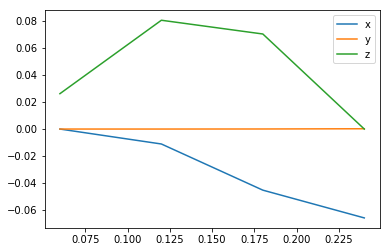

In [23]:
from monitor import plot_position

plot_position(results)

In [ ]:
from monitor import plot_velocity

plot_velocity(results)

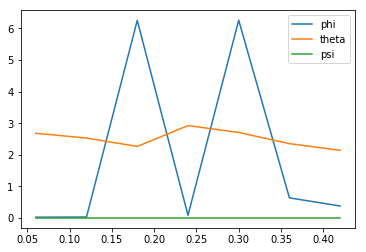

In [106]:
from monitor import plot_euler_angles

plot_euler_angles(results)

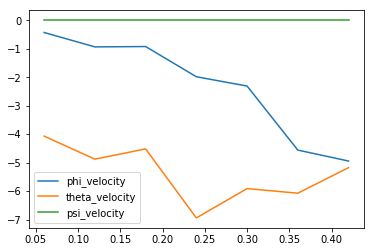

In [107]:
from monitor import plot_euler_angles_velocities

plot_euler_angles_velocities(results)

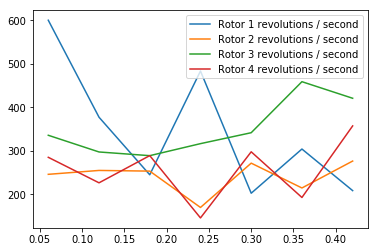

In [108]:
from monitor import plot_choice_of_actions

plot_choice_of_actions(results)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: